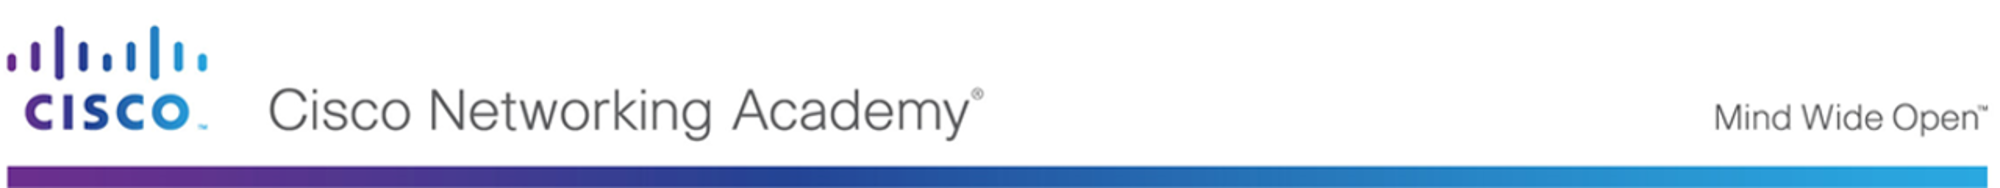

# Lab - Internet Speed Compliance 


### Objectives
<p>
<li>**Part 1: Determine if the Delivered Internet Speed Complies with the Provider's Contract**</li>
<li>**Part 2: Write a Report to the Internet Provider (Optional)**</li>

### Scenario/Background
* In the first part of this lab, you will learn how to answer questions in a scientific way, with data. You will use descriptive statistics and plots to determine the Internet speed and visualize the results. Your analysis will be carried out using Scikit-Learn, Pandas, and Matplotlib. 

* In the second part of this lab, you will learn how to report quantitative findings, and how to support conclusions in a scientific way. You will illustrate your results with plots, making sure that these are as clear and insightful as possible. You will generate professional-looking graphs by means of the Seaborn library, or other styles such as FiveThirtyEight.

### Required Resources
<p>
* 1 PC with Internet access
* Raspberry Pi version 2 or higher
* Python libraries: datetime, pandas, numpy, pandas, scikit-learn, matplotlib, seaborn.
* Datafiles: rpi_data_processed.csv
* A word processor to write your report

## Part 1: Determine if the Delivered Internet Speed Complies with the Provider's Contract

It is likely that, when signing up for Internet service, your provider has committed to a certain quality of service. For example, you may have received a quote for the maximum speed of download that can be achieved at your address. The first part of this lab will help you to answer the question "Is my Internet connection faster or slower than promised?" 

Start by importing the relevant libraries.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

# Choose a style sheet to use from the matplotlib or use the method shown in the chapter to create a custom style sheet.
plt.style.use('fivethirtyeight')


##### Step 1: Importing and cleaning data

The file `rpi_data_compact.csv` contains the Internet speed data you need for this lab. You must clean the Internet speed data and save the result in a new file called `rpi_data_processed.csv`.
 

In [10]:
# Import data from csv file into a dataframe and display the first few rows
df_compact = pd.read_csv('./Data/rpi_data_compact.csv')

df_compact.head()


,Unnamed: 0,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,0,26.992,91.80,14.31,2016-11-24,13:36:25
1,1,24.532,88.19,14.12,2016-11-24,13:36:55
2,2,20.225,59.86,14.11,2016-11-24,13:37:25
3,3,19.332,91.81,14.22,2016-11-24,13:37:57
4,4,22.494,92.05,14.08,2016-11-24,13:38:27


Remove the extra index column

In [11]:
# Remove extra index columns
df_compact.drop(['Unnamed: 0'], inplace=True, axis=1)


Find and remove any null values

In [13]:
# How many values in dataframe are NaN?
df_compact.isnull().sum().sum()

# Remove NaN values
df_compact = df.dropna()
df_compact.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,26.992,91.80,14.31,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24,13:37:25
3,19.332,91.81,14.22,2016-11-24,13:37:57
4,22.494,92.05,14.08,2016-11-24,13:38:27


Convert the ping and dowload values to float

In [35]:
# Convert Ping and Download to float
pd.options.mode.chained_assignment = None
df_compact['Ping (ms)'] = df_compact['Ping (ms)'].apply(lambda val: float(val))
df_compact['Download (Mbit/s)'] = df_compact['Download (Mbit/s)'].apply(lambda val: float(val))

# Save the new cleaned dataframe to a csv called rpi_data_processed.csv. 
# Make sure to use 'index=False' so that you do not introduce an additional column
df_compact.to_csv('./rpi_data_processed.csv', index=False)

df_clean = df_compact

##### Step 2: Understanding the promise

Typically, your provider will not promise a guaranteed minimum Internet speed. Usually, it will only specify the maximum Internet speed that can be delivered at your location. This makes the question 'Is my internet connection faster or slower than promised?' and assessing the quality of service becomes a little tricky. 

The tasks below will help you decide on an **acceptable Internet speed**. This value will then be used to assess whether your provider delivers a satisfactory service.   

* Do some research online to try and find out what download speed can be reasonably expected in your area. You may also want to take into consideration the Internet speed necessary for a given task. For example, online media streaming websites typically require a download speed of at least 1.5 Mbit/s. If you feel that your contract with the Internet provider should enable you to stream videos, this value could indicate your minimum expectation.  

* Plot your data, and decide on a value for the minimum acceptable **download speed**, **upload speed** and **ping time**. The minimum expectation you found should also be kept in mind. 

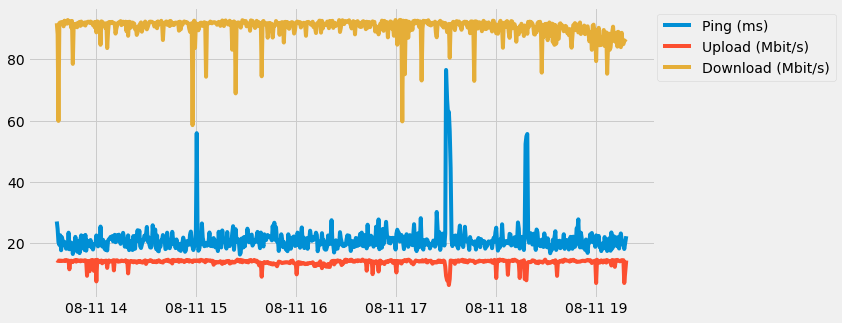

In [36]:
# Initialize figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot three curves of different colors
t = pd.to_datetime(df_compact['Time'])
ax.plot(t, df_compact['Ping (ms)'], label='Ping (ms)')
ax.plot(t, df_compact['Upload (Mbit/s)'], label='Upload (Mbit/s)')
ax.plot(t, df_compact['Download (Mbit/s)'], label='Download (Mbit/s)')

# Insert a legend outside of the main plot
ax.legend(bbox_to_anchor=(1.3, 1.))
plt.show()

In [37]:
# Record the values you consider acceptable in these variables
# Examples:
acceptable_upload = 13 #Mbit/s
acceptable_download = 88 #Mbit/s
acceptable_ping = 20 #ms

##### Step 3: Comparing with expectations

You have a clean dataset, and have specified the acceptable values. This means that you are ready to begin the bulk of your analysis. A good strategy is to begin with easy tasks and gradually build up to more advanced methods. 

a) Plot histograms for download rate, upload rate, and ping time. On each of these plots, use a vertical line to indicate the value found to be acceptable for each measurement. 

Text(0.5, 1.0, 'Download (Mbit/s)')

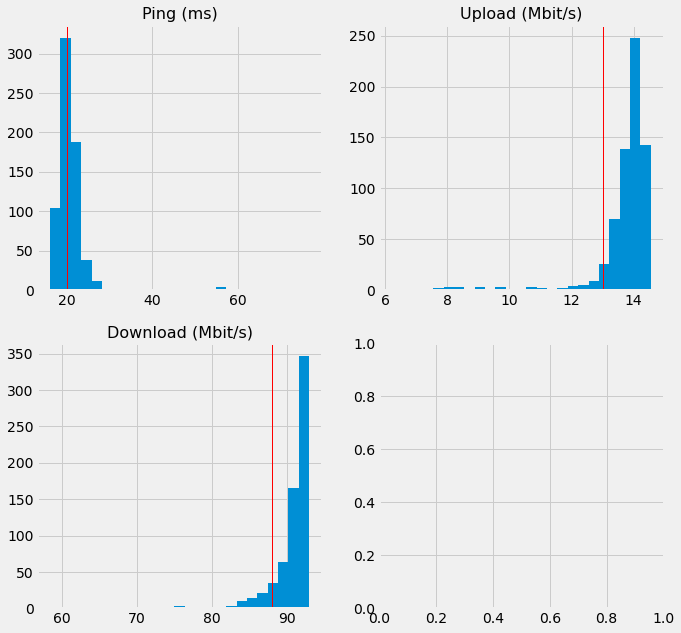

In [38]:
# Initialize figure
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# plot ping speed
ax[0][0].hist(df_compact['Ping (ms)'], 25)
# plot acceptable ping 
ax[0][0].axvline(acceptable_ping, color='red', linewidth=1)
ax[0][0].set_title('Ping (ms)', fontsize=16)

# plot upload speed
ax[0][1].hist(df_compact['Upload (Mbit/s)'], 25)
# plot acceptable upload
ax[0][1].axvline(acceptable_upload, color='red', linewidth=1)
ax[0][1].set_title('Upload (Mbit/s)', fontsize=16)

# plot download speed
ax[1][0].hist(df_compact['Download (Mbit/s)'], 25)
# plot acceptable download
ax[1][0].axvline(acceptable_download, color='red', linewidth=1)
ax[1][0].set_title('Download (Mbit/s)', fontsize=16)

b) Compute the mean and standard deviation of download rate, upload rate, and ping time and calculate how many standard deviations separate the acceptable values from the average ones. 

In [43]:
# compute the means and the standard deviations of the various measures
means = df_compact[['Ping (ms)', 'Download (Mbit/s)', 'Upload (Mbit/s)']].mean()
stands = df_compact[['Ping (ms)', 'Download (Mbit/s)', 'Upload (Mbit/s)']].std()

# this makes the results look better with labels
quote_ping = (means['Ping (ms)'], stands['Ping (ms)'])
quote_download = (means['Download (Mbit/s)'], stands['Download (Mbit/s)'])
quote_upload = (means['Upload (Mbit/s)'], stands['Upload (Mbit/s)'])

# print the results
print('Average ping time: {} ± {} ms'.format(*quote_ping))
# print Average download speed 
print('Average download time: {} ± {} ms'.format(*quote_download))
# print Average upload speed 
print('Average upload time: {} ± {} ms'.format(*quote_upload))
# blank line
print
print('Distance of acceptable Ping speed from average: {:.2f} standard deviations'.format((quote_ping[0]-acceptable_ping)/quote_ping[1]))
# print('Distance of acceptable Download speed from average 
print('Distance of acceptable Download speed from average: {:.2f} standard deviations'.format((quote_download[0]-acceptable_download)/quote_download[1]))
# print('Distance of acceptable Upload speed from average 
print('Distance of acceptable Upload speed from average: {:.2f} standard deviations'.format((quote_upload[0]-acceptable_upload)/quote_upload[1]))

Average ping time: 21.115451708766717 ± 5.161225495663228 ms
Average download time: 90.44921248142644 ± 3.465647031815227 ms
Average upload time: 13.697607726597328 ± 1.0804708853031766 ms
Distance of acceptable Ping speed from average: 0.22 standard deviations
Distance of acceptable Download speed from average: 0.71 standard deviations
Distance of acceptable Upload speed from average: 0.65 standard deviations


c)Calculate the percentage of download speed measurements that are not acceptable. Repeat this calculation for upload speed and ping rate. 

In [44]:
print('{:.2f}% of measurements are lower than the acceptable download speed.'.format(np.sum(df_compact['Download (Mbit/s)']<acceptable_download)/float(len(df_compact))*100))


print('{:.2f}% of measurements are lower than the acceptable upload speed.'.format(np.sum(df_compact['Upload (Mbit/s)']<acceptable_upload)/float(len(df_compact))*100))

print('{:.2f}% of measurements are lower than the acceptable ping speed.'.format(np.sum(df_compact['Ping (ms)']<acceptable_ping)/float(len(df_compact))*100))



11.00% of measurements are lower than the acceptable download speed.
7.88% of measurements are lower than the acceptable upload speed.
42.79% of measurements are lower than the acceptable ping speed.


d) Find the percentage of measurements that fail to satisfy your criteria of acceptable service in all three quantities.

In [45]:
all_three = np.sum((df_compact['Ping (ms)']>acceptable_ping) & (df_compact['Download (Mbit/s)']<acceptable_download) & (df_compact['Upload (Mbit/s)']<acceptable_upload))
print('{:.2f}% of measurements are not acceptable in three cases.'.format(all_three/float(len(df_compact))*100))

0.74% of measurements are not acceptable in three cases.


e) Find the percentage of measurements that fail to satisfy your criteria of acceptable service in two out of three quantities. 

In [47]:
ping_upload = np.sum((df_compact['Ping (ms)']>acceptable_ping) & (df_compact['Upload (Mbit/s)']<acceptable_upload))
print('{:.2f}% of measurements are not acceptable for ping and upload.'.format(ping_upload/float(len(df_compact))*100))

#ping_download = ...
#print(...)
ping_download = np.sum((df_compact['Ping (ms)']>acceptable_ping) & (df_compact['Download (Mbit/s)']<acceptable_download))
print('{:.2f}% of measurements are not acceptable for ping and download.'.format(ping_download/float(len(df_compact))*100))

# upload_download = ...
#print(...)
upload_download = np.sum((df_compact['Upload (Mbit/s)']>acceptable_upload) & (df_compact['Download (Mbit/s)']<acceptable_download))
print('{:.2f}% of measurements are not acceptable for upload and download.'.format(upload_download/float(len(df_compact))*100))


4.90% of measurements are not acceptable for ping and upload.
6.39% of measurements are not acceptable for ping and download.
9.66% of measurements are not acceptable for upload and download.


Now you have a good idea of what to expect from your Internet connection and you know what is and what is not acceptable. You can write a report to inform your internet provider of what is happening with your connection. You will be able to use everything you have computed in this part, and you can add anything that you think can be useful to help your cause. 

## Part 2: Write a Report to the Internet Provider (Optional)

Informing and convincing people is a very valuable skill to have. Persuasion occurs almost exclusively through logical arguments as supported by quantitative evidence. Plots, statistics, and numerical results are considered the professional way to convey information to a technical audience. The second part of this lab will strengthen your ability to report quantitative findings and to convince readers with evidence-based arguments.

Imagine that you are writing to your Internet provider, to inform the company about the quality of Internet connection at your home, school, or workplace. This report should not exceed 800 words, and should be directed to a person having some knowledge of mathematics and basic engineering, but no understanding of machine learning. As your reader will not be easily convinced, it is vital that you back up statements with calculations and plots. The analysis you have carried out in Part 1 provide these results. 

The report should be structured in the following way:

* Introduction
* Methods
* Results
* Conclusions

The report will be broken down into details in the remainder of the notebook. The given structure is general enough to be used to write a scientific report for other purposes. Check out the resources listed at the very end of the notebook to learn more.

### Introduction

The introduction of the report should provide context in regard to your analysis. It should also summarize your findings. A good introduction should not discuss how exactly you have proceeded, or describe the techniques you have employed. Rather, it should give an intuitive understanding of what motivated you, and what the reader is meant to take away. 

You may also include background information that you have gathered online, such as statistics about the speed of Internet in your area or at the national level. 





### Methods

Here, describe how you arrived at your conclusions. You may, for example, explain how you settled for certain values as your 'acceptable Internet connection'. Similarly, you could illustrate the techniques used in Part 1, Step 3. You can also say something about the data you are analyzing (how you collected it, its meaning, the frequency of the collection, the time span of the dataset). Remember that the reader has limited knowledge of statistics and you will have to find simple ways to communicate advanced concepts. 



### Results

Here, describe the outcome of your calculations and present the plots that you have generated. Label your plots in a clear way to make these figures look professional. Numerical results should be quoted in the standard format:
$$\mathrm{quantity} = \mathrm{mean\ value} \pm \mathrm{standard\ deviation}.$$ 

You can show the numerical results in tables, if you think the results will be more clear.



### Conclusions

This is your last chance to persuade your reader. You should start with a recap of what you have presented in the report. You should summarize your main ideas and give an effective brief description of the evidence supporting your position. Any action that you would like to see implemented from your Internet provider ought to be requested here. If you make some criticism, make sure that this is done in a constructive way. 



### Resources

Resources on how to write a scientific report:
* Scientific Report Writing, the Skills Team, University of Hull http://www2.hull.ac.uk/lli/pdf/Scientific%20Reports.pdf
* Writing scientific reports, The writer's handbook, http://writing.wisc.edu/Handbook/ScienceReport.html
* Writing a scientific report, Unifersity of New England, https://www.une.edu.au/__data/assets/pdf_file/0010/10324/WE_Writing-a-scientific-report.pdf

<font size='0.5'>&copy; 2017 Cisco and/or its affiliates. All rights reserved. This document is Cisco Public.<font>